# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [2]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

In [3]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [4]:
# Combine the data into a single DataFrame
Mouse_Study_Combined = pd.merge(mouse_metadata, study_results, how='right', on='Mouse ID')

# Display the data table for preview
Mouse_Study_Combined

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.000000,0
1,f932,Ketapril,Male,15,29,0,45.000000,0
2,g107,Ketapril,Female,2,29,0,45.000000,0
3,a457,Ketapril,Female,11,30,0,45.000000,0
4,c819,Ketapril,Male,21,25,0,45.000000,0
...,...,...,...,...,...,...,...,...
1888,r944,Capomulin,Male,12,25,45,41.581521,2
1889,u364,Capomulin,Male,18,17,45,31.023923,3
1890,p438,Ceftamin,Female,11,26,45,61.433892,1
1891,x773,Placebo,Female,21,30,45,58.634971,4


In [5]:
# Checking the number of mice.
mouse_count = len(Mouse_Study_Combined["Mouse ID"].unique())
mouse_count

249

In [6]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicates = Mouse_Study_Combined.loc[Mouse_Study_Combined.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicates

array(['g989'], dtype=object)

In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
#duplicate_df = pd.DataFrame(Mouse_Study_Combined.loc[Mouse_Study_Combined.duplicated(subset=['Mouse ID', 'Timepoint'])])
#duplicate_df
duplicate_df = Mouse_Study_Combined.loc[Mouse_Study_Combined['Mouse ID'] == "g989"]
duplicate_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,Propriva,Female,21,26,0,45.000000,0
137,g989,Propriva,Female,21,26,0,45.000000,0
329,g989,Propriva,Female,21,26,5,48.786801,0
360,g989,Propriva,Female,21,26,5,47.570392,0
620,g989,Propriva,Female,21,26,10,51.745156,0
681,g989,Propriva,Female,21,26,10,49.880528,0
815,g989,Propriva,Female,21,26,15,51.325852,1
869,g989,Propriva,Female,21,26,15,53.442020,0
950,g989,Propriva,Female,21,26,20,55.326122,1
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Use keep='last' to keep the last occurrence 
Cleaned_Combined = Mouse_Study_Combined[Mouse_Study_Combined["Mouse ID"].isin(duplicates)==False]
Cleaned_Combined.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [9]:
# Checking the number of mice in the clean DataFrame.
cleaned_mouse_count = len(Cleaned_Combined["Mouse ID"].unique())
cleaned_mouse_count

248

## Summary Statistics

In [10]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
#mean
mean = Cleaned_Combined.groupby(["Drug Regimen"])['Tumor Volume (mm3)'].mean()

#median
median = Cleaned_Combined.groupby(["Drug Regimen"])['Tumor Volume (mm3)'].median()

#variance
var_numpy = Cleaned_Combined.groupby(["Drug Regimen"])['Tumor Volume (mm3)'].var()

#StD
sd_numpy = Cleaned_Combined.groupby(["Drug Regimen"])['Tumor Volume (mm3)'].std()

#SEM
sem_numpy = Cleaned_Combined.groupby(["Drug Regimen"])['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
Summary_df = pd.DataFrame({"Mean Tumor Volume": mean,
                                 "Median Tumor Volume": median, 
                                 "Tumor Volume Variance": var_numpy,
                                 "Tumor Volume Std. Dev.": sd_numpy,
                                 "Tumor Volume Std. Err.": sem_numpy})

Summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
Summary = Cleaned_Combined.groupby('Drug Regimen').agg(['mean', 'median', 'var', 'std', 'sem'])['Tumor Volume (mm3)']
Summary

/var/folders/nx/flhqw_090sdffg9ccwg45xlw0000gn/T/ipykernel_29489/571410855.py:5: FutureWarning: ['Mouse ID', 'Sex'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  Summary = Cleaned_Combined.groupby('Drug Regimen').agg(['mean', 'median', 'var', 'std', 'sem'])['Tumor Volume (mm3)']


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

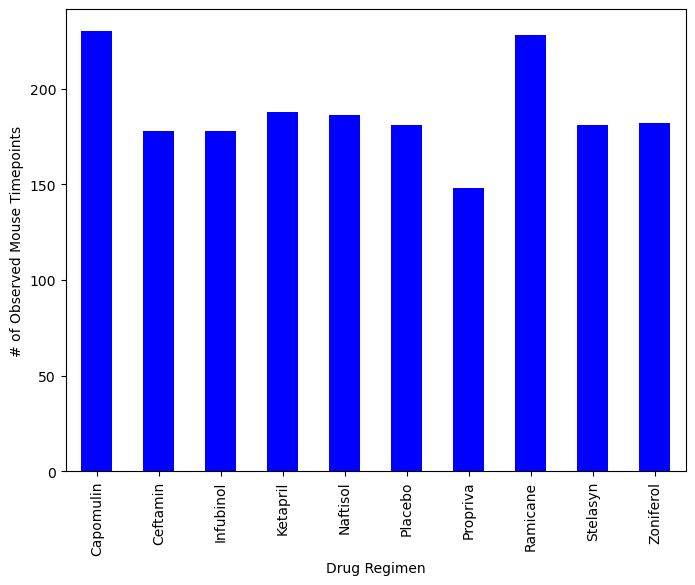

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# Filter the DataFrame down only to those columns to chart
PD_Plot = Cleaned_Combined.groupby(["Drug Regimen"]).count()['Mouse ID']

# Configure plot, figsize, title, and axis labels
FinalPD_Plot = PD_Plot.plot(kind="bar", facecolor="blue", figsize=(8,6),
                                xlabel="Drug Regimen",
                                ylabel="# of Observed Mouse Timepoints")


# Show plot
plt.show()


In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Create an array that contains the number of mice each language regimen has
mice = Cleaned_Combined.groupby(["Drug Regimen"]).count()['Mouse ID']
mice.to_numpy()

array([230, 178, 178, 188, 186, 181, 148, 228, 181, 182])

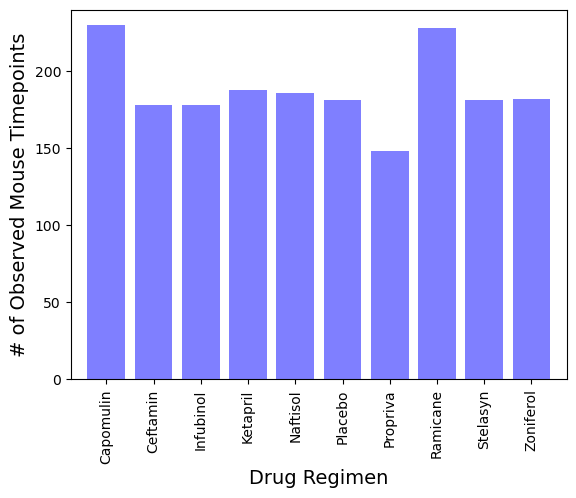

In [14]:
# Tell matplotlib that we will be making a bar chart
# Users is our y axis and x_axis is, of course, our x axis
# We apply align="edge" to ensure our bars line up with our tick marks
x_axis = np.arange(len(PD_Plot))
plt.bar(x_axis, mice, color='blue', alpha=0.5, align='center')

# Tell matplotlib where we would like to place each of our x axis headers
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')

# Sets the x limits of the current chart
plt.xlim(-0.75, len(x_axis)-0.25)

# Sets the y limits of the current chart
plt.ylim(0, max(mice)+10)

# Give our chart some labels and a tile
plt.xlabel("Drug Regimen", fontsize = 14)
plt.ylabel("# of Observed Mouse Timepoints", fontsize = 14)
plt.show()

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_sex = Cleaned_Combined.groupby(["Sex"]).count()['Mouse ID']
mice_sex

Sex
Female    922
Male      958
Name: Mouse ID, dtype: int64

<AxesSubplot:ylabel='Mouse ID'>

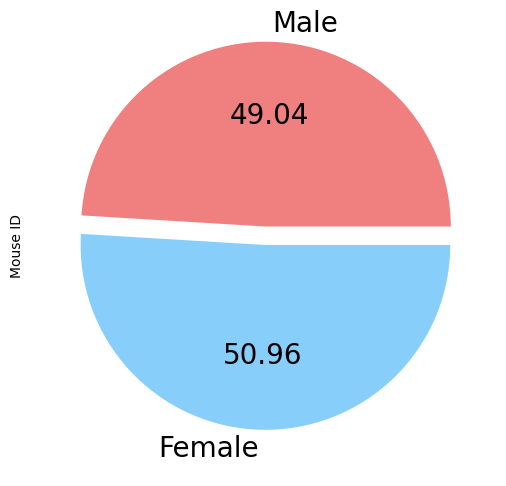

In [28]:
mice_sex.plot.pie(
    labels=["Male", "Female"],
    colors=["lightcoral", "lightskyblue"],
    autopct="%.2f",
    fontsize=20,
    explode=(0.1, 0),
    figsize=(6, 6))

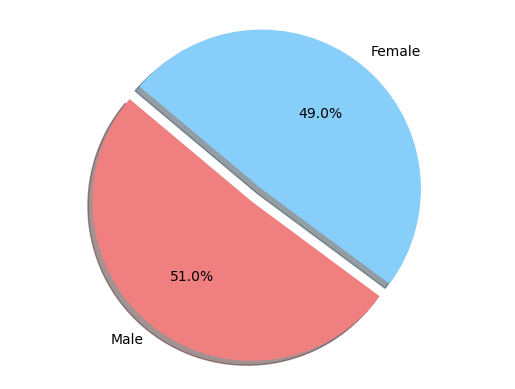

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Labels for the sections of our pie chart
labels = ["Male", "Female"]

# The values of each section of the pie chart
sizes = [958, 922]

# The colors of each section of the pie chart
colors = ["lightcoral", "lightskyblue"]

# Tells matplotlib to separate the "Humans" section from the others
explode = (0.1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse (first)


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels) put the treatments in a list and put into a variable


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. Begin your for loop with the list created from above

    
    # Locate the rows which contain mice on each drug and get the tumor volumes *within for loop--should give a series

    
    # add subset *add the series from the locate into the empty list

    
    # Determine outliers using upper and lower bounds *class activities, on the series as looping through: looping through the list of the four treatments


In [ ]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
